<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

<center><h1><b> Logistic Regression Assignment (Questions) <b><h1>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Pre Profiling Report**](#Section44)

**5.** [**Data Pre-processing**](#Section5)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing**](#Section7)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>

**9.** [**Write your Observation**](#Section9)<br>

<a id = Section1></a>

---
# **1. About the Dataset**

---
**Pumpkin seeds** are frequently consumed as confection worldwide because of their adequate amount of protein, fat, carbohydrate, and mineral contents. This study was carried out on the two most important and quality types of pumpkin seeds, `Urgup_Sivrisi` and `Cercevelik`, generally grown in Urgup and Karacaoren regions in Turkey.
- The classification goal is to predict to which variety a seed belongs making ***Class*** our target variable

- Morphological measurements of **2500** pumpkin seeds of both varieties were made possible by using the gray and binary forms of threshold techniques.





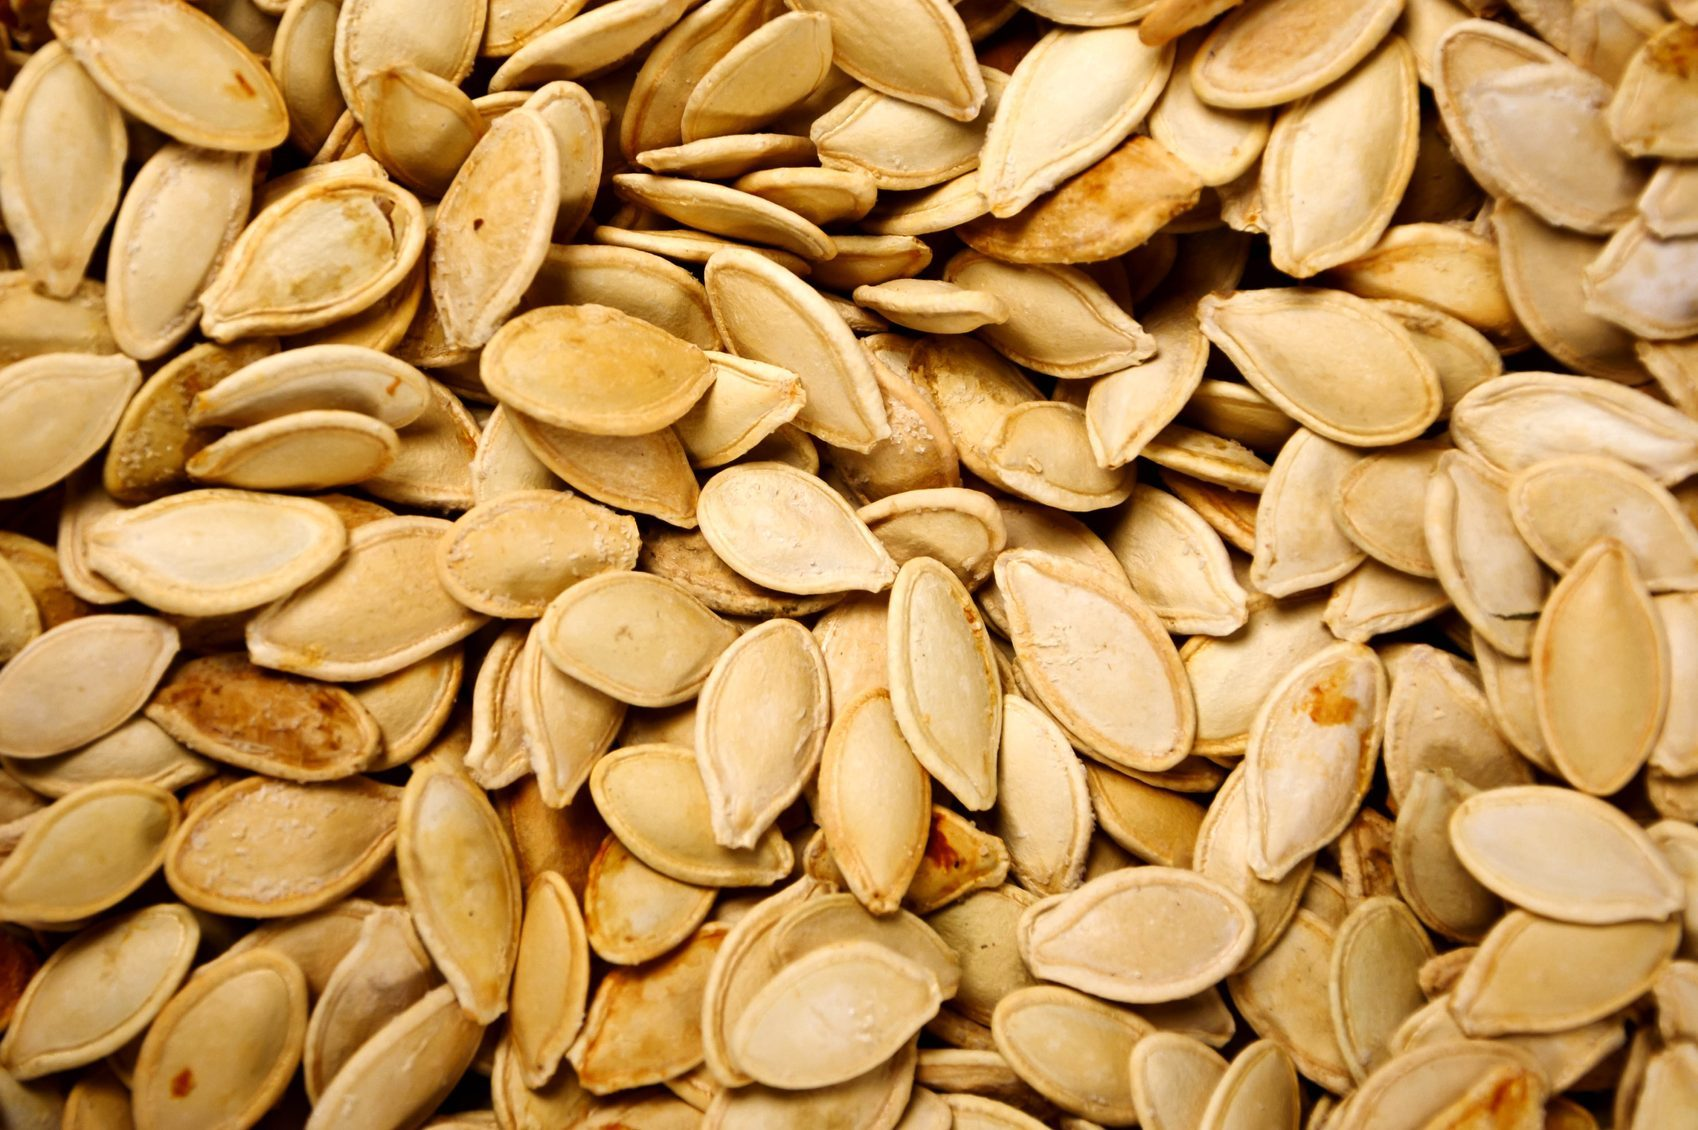

<a id = Section2></a>

---
# **2. Problem Statement**
---

- The classification goal is to predict to which variety a seed belongs making `Class` our target variable.
- `Urgup_Sivrisi` and `Cercevelik` are the two types of seeds which have 12 features making them distinct.

<a id = Section3></a>

---
# **3. Installing and importing libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Toolbox for Generating Statistics Report
!pip install -q yellowbrick                   # Toolbox for Measuring Machine Performance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 46.5 MB/s eta 0:00:00
ERROR: Operation cancelled by user
ERROR: Operation cancelled by user


<a id = Section32></a>
### **3.2 Upgrading Libraries**

**Note:** After upgrading, you need to restart the runtime. Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

ERROR: Operation cancelled by user
ERROR: Operation cancelled by user


<a id = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
# For Panel Data Analysis
import pandas as pd
import numpy as np
import re
import missingno as msno

from pandas_profiling import ProfileReport

# For Random seed values
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns

# For Preprocessing
import sklearn as sk

# For Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For metrics evaluation
from sklearn.metrics import accuracy_score,roc_auc_score, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

<a id = Section4></a>

---
# **4. Data Acquisition and Description**
---

- This data is based on the various features that are present in the **seeds** and the **classification** of them based on it.
- The description of the data is as follows:

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 2500 | 13 | 296 KB |



| Id | Features | Description |
| :-- | :--| :--|
|01| **Area** | Surface area of seeds |
|02| **Perimeter** | Perimeter of seeds
|03| **Major_Axis_Length** | Length of seed|
|04| **Minor_Axis_Length** | Length of seed |
|05| **Convex_Area** | Convex Area |
|06| **Equiv_Diameter** | Diameter of seed |
|07| **Eccentricity** | Eccentricity of seed
|08| **Solidity** | Solidity of seed |
|09| **Extent** | Span of seed |
|10| **Roundness** | Roundness of seed
|11| **Aspect_Ration** | Aspect of seed |
|12| **Compactness** | Compactness of seed |
|13| **Class** | To which class the seed belongs|


In [3]:
import pandas as pd

In [5]:
seed_data = pd.read_csv('https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%204%20ML1/Module%203%20Logistic%20Regression/Pumpkin_Seeds_Dataset.csv')
print("Data Shape: ",seed_data.shape)

Data Shape:  (2500, 13)


**Examine first 5 rows of the data**

In [6]:
seed_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


<a id = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
print('Described Column Length:', len(seed_data.describe().columns))

In [ ]:
seed_data.describe()

**Observations:**
- There are **no** **missing values** in the dataset.
- There are **no duplicate rows**

<a id = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
seed_data.info()

**Observations:**
- There are **13 features**, out of which **10 are float**, **2 are integer values** and **1 is object type values**, which is our target variable.


<a id = Section44></a>
### **4.3 Pre Profiling Report**

- For quick analysis pandas profiling is very handy.
- Generates profile reports from a pandas DataFrame.
- For each column statistics are presented in an interactive HTML report.

In [ ]:
#profile = ProfileReport(seed_data)
#profile.to_file(output_file="Pre Profiling Report.html")
#print('Pre-Profiling Accomplished!')

In [ ]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

<a id = Section5></a>
# **5. Data Pre-Processing**

---
**<h4>Question 1:** Create a function that returns the dataframe displaying the null value counts and their percentage using pandas isnull function.</h4>

---

<details>

**<summary>Hint:</summary>**

- You first have to create a dataframe where the index is name of the columns `null_frame = pd.DataFrame(index = df.columns.values)`

- Then you create a column **Null Frequency** that would contain the sum of the null values which you can do using `null_frame['Null Frequency'] = df.isnull().sum().values`

- Once you are done with this step then you calculate the percentage of Missing values using `percent = df.isnull().sum().values/df.shape[0]`

- Then you create a new column in the same dataframe using the code `null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100`

- Once, you have the columns you can simply return the transpose of the dataframe using `null_frame.transpose()`

</details>

In [ ]:
def null_data(df):
  # Write Your Code Here

In [ ]:
null_data(seed_data)

---
**<h4>Question 2:** Create a function that identifies the zero data and display that information in a dataframe.</h4>

---

<details>

**<summary>Hint:</summary>**

- You first have to create a dataframe where the index is name of the columns `zero_frame = pd.DataFrame(index = df.columns.values)`

- Then you create a column **Zero Frequency** that would contain the sum of the Zero values which you can do using `zero_frame['Zero Frequency'] = df[df == 0].count().values`

- Once you are done with this step then you calculate the percentage of Zero values using `percent = df[df == 0].count().values / df.shape[0]`

- Then you create a new column in the same dataframe using the code `zero_frame['Zero %age'] = np.round(percent, decimals = 4) * 100`

- Once, you have the columns you can simply return the transpose of the dataframe using `zero_frame.transpose()`

</details>

In [ ]:
def find_zero(df):
  # Write Your Code Here

In [ ]:
find_zero(seed_data)

- This makes it evident that we have no missing or irrelevant zero data

---
**<h4>Question 3:** Create a function that tells you if there are any redundant records in the dataframe or not and also tell you the count of the duplicated records.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `df.duplicated().any()` to find if there are any duplicated records in the dataframe.

- Using `df.duplicated().sum()` will tell you the count of duplicated records if there are any duplicated records.
</details>

In [ ]:
def duplicate_count(df):
 # Write Your Code Here

In [ ]:
duplicate_count(g_data)

- This makes it evident that we have no redundancy in data

<a id = Section55></a>
### **5.1 Post Profiling Report**

- In post profiling, we identify the changes over cleansed data.

In [ ]:
#profile = ProfileReport(df)
#profile.to_file(output_file="Post Profiling Report.html")
#print('Post-Profiling Accomplished!')

In [ ]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Post Profiling Report.html')     # Use only if you are using Google Colab, otherwise remove it

<a id = Section6></a>
# **6. Exploratory Data Analysis**

---
**<h4>Question 4:** Create a function to get the frequency distribution of the numerical features in the dataset? </h4>

---

<details>

**<summary>Hint:</summary>**

- First we drop the column `Class` mentioning the axis as 1 and calling the hist function in Pandas with the help of code `df.drop('Class',axis=1).hist(figsize=(12,7))`

- Then we go ahead and name the chart a title with the help of `plt.suptitle("Features histograms", fontsize=16)`.

- Then we tighten the layout using `plt.tight_layout()` then we sets the top margin of the subplots to 0.9 using `plt.subplots_adjust(top=0.9)` and then we display the figure using `plt.show()`.

In [ ]:
def plot_hist(df):
  # Write Your Code Here

In [ ]:
plot_hist(seed_data)

---
**<h4>Question 5:** Create a function to get the frequency distribution of the target variable in the dataset? </h4>

---

<details>

**<summary>Hint:</summary>**

- First we set the figure siz using `plt.figure(figsize=(22,5))`

- Then we use the countplot method in seaborn library and pass the target variable using the code `sns.countplot(x='Class',data=df)`.

- We will then add the title to the chart using `plt.title('Target')` and define labels for our xticks labels in the form of a list using `labels = ['Not Conflicting', 'Conflicting']`

- We then define the xticks and their labels with the help of `plt.xticks(ticks = [0,1], labels=labels)` and then lastly use the `plt.show()` to display the chart.

In [ ]:
def countplot(df):
  # Write Your Code Here

In [ ]:
countplot(seed_data)

* The classes are almost equally distributed. This ensures that are model cannot be biased towards any class.

---
**<h4>Question 6:** How is the surface area of seed distributed?</h4>

---

<details>

**<summary>Hint:</summary>**
- Use `sns.histplot(data=df, x='Area', kde=True, hue='Class')`

In [ ]:
def area(df):
  #write your code here

area(seed_data)


---
**<h4>Question 7:** How is the compactness of the seed distributed ?</h4>

---

<details>

**<summary>Hint:</summary>**
- Use `sns.histplot(data=df, x='Compactness', kde=True, hue='Class')`

In [ ]:
def compactness(df):
  #write your code here

compactness(seed_data)

---
**<h4>Question 8:** How are all the features correlated to each other? How much are they correlated?</h4>

---

<details>

**<summary>Hint:</summary>**
- Create a correlation heatmap

- We create a subplot using the code `f, ax = plt.subplots(figsize=(10, 8))`

- Once done, we then call the heatmap function from the seaborn library and the pass the correlation dataframe using `df.corr()` and then get show the correlation on the heatmap with the help of annot argument using the code `sns.heatmap(df.corr(), annot=True)`

- Finally we display the figure using `plt.show()` method.

In [ ]:
def heatmap(df):
  # Write Your Code Here

In [ ]:
heatmap(seed_data)

* As `Convex_Area` , `Equiv_Diameter`and `Perimeter` are essentially the same as the `Area` and `Aspect_Ration` and `Roundness` are similar to the `Compactness`, we will drop these **highly correlated** features as they're not bringing any new information and increasing complexity.

---
**<h4>Question 9:** Drop the highly correlated features and plot the heatmap again. </h4>

---

<details>

**<summary>Hint:</summary>**

- First we define the figure size `plt.figure(figsize = (12, 8)`

- Then we drop all the highly correlated columns.
`df.drop(columns=['Convex_Area', 'Equiv_Diameter', 'Perimeter', 'Aspect_Ration','Roundness'], axis=1, inplace=True)`

- Finally we display the heatmap using the above function `heatmap()`

In [ ]:
def final_heatmap(df):
  # Write Your Code Here

In [ ]:
final_heatmap(seed_data)

---
**<h4>Question 10:** Create a pairplot to understand the relationships between the data clearly </h4>

---

<details>

**<summary>Hint:</summary>**

- For plotting a pairplot use :
`sns.pairplot(df)`

```

</details>

In [ ]:
def pairplot(df):
  # Write Your Code Here

In [ ]:
pairplot(seed_data)

<a id = Section7></a>

---
# **7. Post Data Processing**
---

- We will **split** our **data** for the **model development**.

---
**<h4>Question 11:**  Encoding the categorical data column, which is the target variable</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `LabelEncoder()` to do that
- First instantiate the function and then fit_transform to the target variable



```
le= LabelEncoder(df['Class'])
df['Class']=le.fit_transform(col)
```


In [ ]:
def encode(df):
  #write your code here

encode(seed_data)

In [ ]:
seed_data.head()

---
**<h4>Question 12:** Shuffling the data as it is sorted by the target variable class</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `df.sample(frac=1)`

- After shuffling, reset the index and drop the previous one-

`df= df.reset_index(drop=True)`

In [ ]:
def shuffle(df):
  #write your code here

shuffle(seed_data)

---
**<h4>Question 13:**  Create a function to split the data into test and train sets using a  20% to 80% split and a random_state of 42.</h4>

---

<details>

**<summary>Hint:</summary>**

- Extract all the predictor features from the dataset by using:
`X = df.drop(['Class'], axis=1)`

- Extract the target feature from the dataset by using:
`y = df['Class']`

- Use sklearn library's train_test_split function to split the dataset into train and test set by keeping 20% of the data for testing. You can do that by using:

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`

</details>

In [ ]:
#splitting data into training and test sets
def split_data(df,test_size=0.2, random_state=42 ):
  # Write Your Code Here

In [ ]:
X_train, X_test, y_train, y_test = split_data(df,test_size=0.2, random_state=0)

In [ ]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

<a id = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop different models**.
- Then we will **compare the results** obtained from them and make our observations.
- For **evaluation purpose** we will plot **precision and recall** for **each estimator** for which a **custom function** is made below .
- We also use **confusion matrix** for **validation** purpose.
- **Remember** that **we want generalize results** i.e. same results or error in testing data as that of training data.
- **At the end** we will **tune** our **models if required**.

<a id = Section83></a>
### **Logistic Regression Classifier**

**<h4>Question 14:** Create a function that instantiates a Logistic Regression Classifier Model with Default Parameters.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate using `lr = LogisticRegression()` and return the same in the function


</details>

In [ ]:
def Initiate_LR():
  # Write Your Code Here

In [ ]:
lr= Initiate_LR()

---
**<h4>Question 15:** Fit the logistic model on X_train and y_train

---

<details>

**<summary>Hint:</summary>**

- `Fit` the model on training set using `lr.fit(X_train, y_train)`






</details>

In [ ]:
def fit_mod(lr):
  # Write Your Code Here

In [ ]:
fit_mod()

---
**<h4>Question 16:** Use the model for prediction on training and test data

---

<details>

**<summary>Hint:</summary>**

- Use:

`y_pred_train= lr.predict(X_train)`

`y_pred_test= lr.predict(X_test)`



In [ ]:
y_pred_train = pd.DataFrame()
def train_pred():
    # create the model prediction on X_train data using the above created dataframe
    return y_pred_train

y_pred_train = train_pred()

In [ ]:
y_pred_test = pd.DataFrame()
def test_pred():
    # create the model prediction on X_test data using the above created dataframe
    return y_pred_test

y_pred_test = test_pred()

---
**<h4>Question 17:** Evaluate the model using accuracy score and classification report

---

<Details>

**<summary>Hint:</summary>**
- Calculate the accuracy of the model-

`accuracy= accuracy_score(y_test, y_pred_test)`

- Create the Classification for both sets report using:

```
lr_report_train = classification_report(y_train, y_pred_train)
lr_report_test = classification_report(y_test, y_pred_test)

```

- Finally Print the Classification Reports:

```
print ('Accuracy =', accuracy*100,'%')
print('                    Training Report          ')
print(lr_report_train)
print('                    Testing Report           ')
print(lr_report_test)

```


In [ ]:
def evaluate(lr):
  #Write your code here

evaluate(lr)

<a id = Section9></a>

---
# **9. Write your observation-**

- Write your observations and conclusions.